# Installing Libraries

In [26]:
# Install required libraries (Run this only if necessary)
!pip install imbalanced-learn scikit-learn pandas numpy matplotlib seaborn xgboost catboost lightgbm tensorflow

In [27]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Import SMOTEENN for handling class imbalance
from imblearn.combine import SMOTEENN

# Load dataset

In [29]:
# Load dataset
data = pd.read_csv("/content/creditcard.csv")

# EDA

1. Class Distribution Visualization

<ipython-input-30-9c1be2a7d887>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=data, palette="coolwarm")


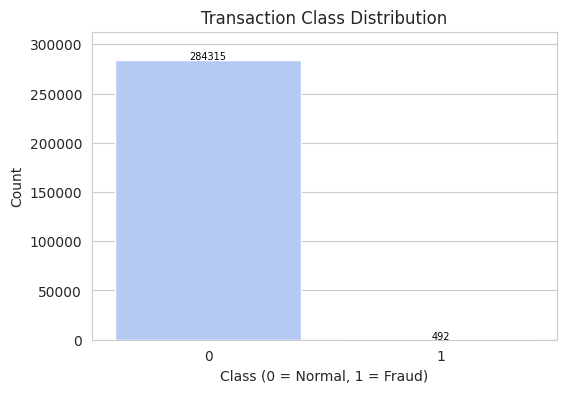

In [30]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Class', data=data, palette="coolwarm")

# Add exact count numbers on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 100,  # Adjust text position
            f'{int(p.get_height())}', ha='center', fontsize=7, color='black')

plt.title("Transaction Class Distribution")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.ylim(0, data['Class'].value_counts().max() * 1.1)  # Adjust y-axis limit for better visibility
plt.show()

2. Distribution of Transaction Amounts

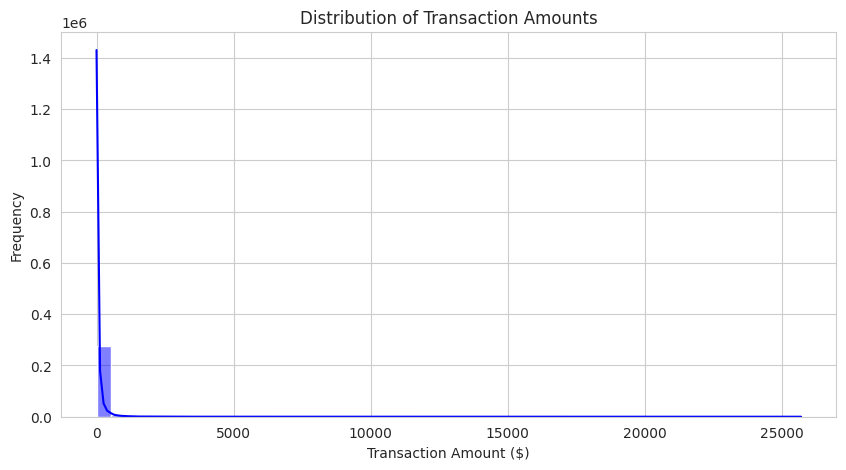

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.show()

3. Distribution of Transaction Time

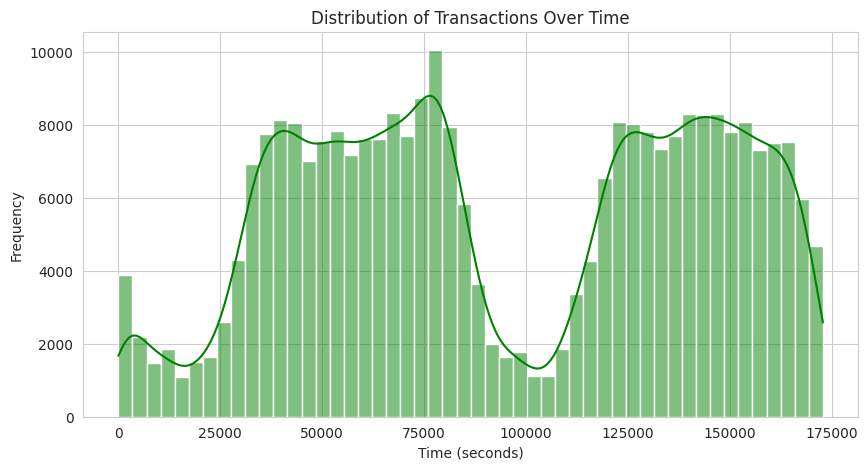

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(data['Time'], bins=50, kde=True, color='green')
plt.title("Distribution of Transactions Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()

4. Correlation Heatmap

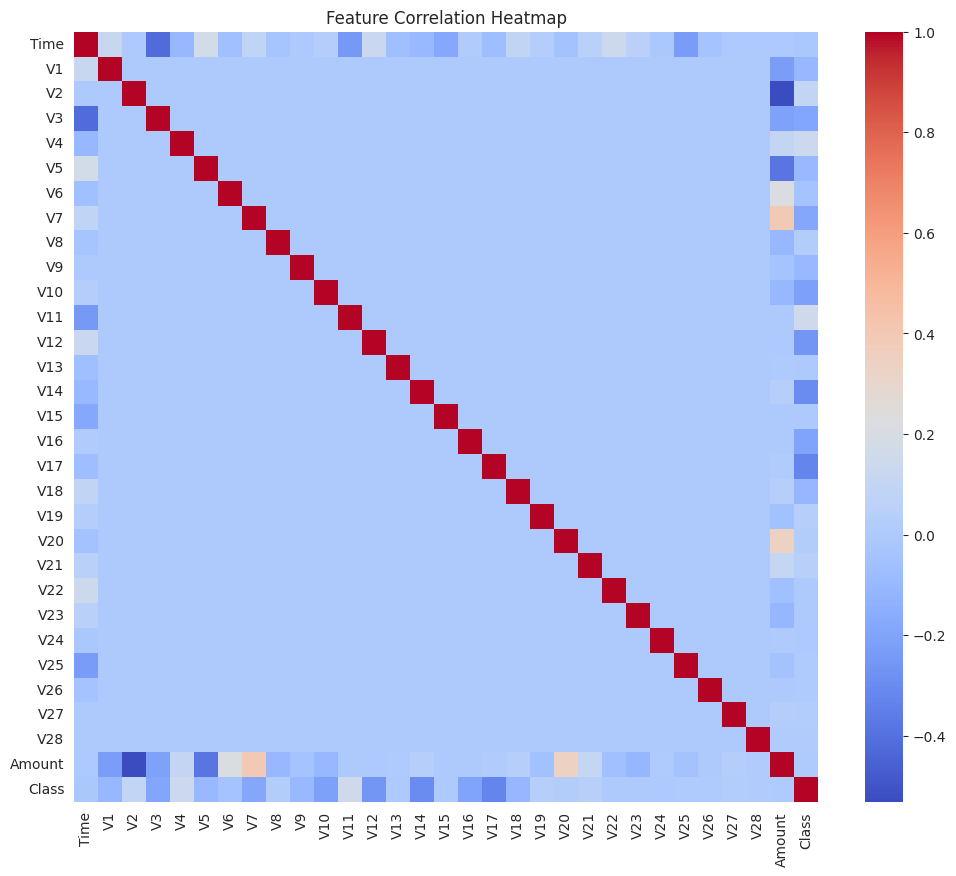

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

5. Fraud vs. Non-Fraud Transaction Amounts

<ipython-input-34-d9d6033a643d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=data, palette="coolwarm")


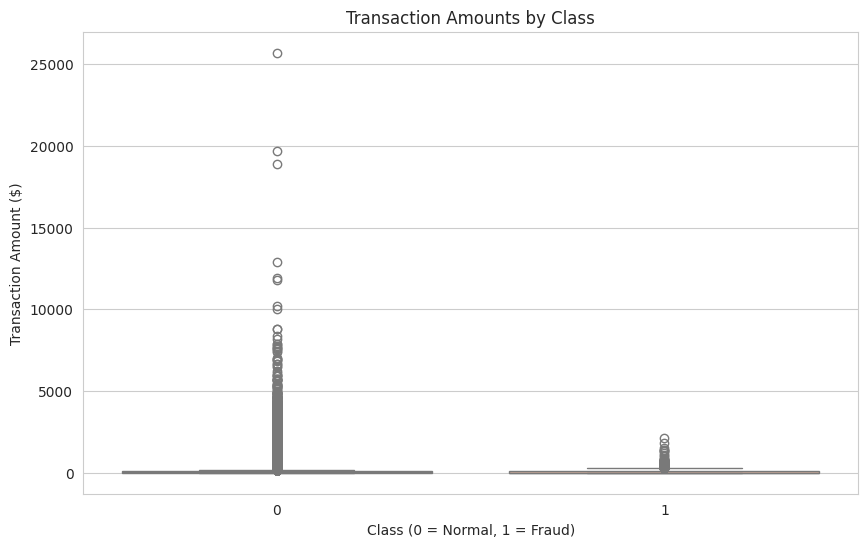

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=data, palette="coolwarm")
plt.title("Transaction Amounts by Class")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Transaction Amount ($)")
plt.show()

6. Fraudulent vs. Non-Fraudulent Transactions Over Time

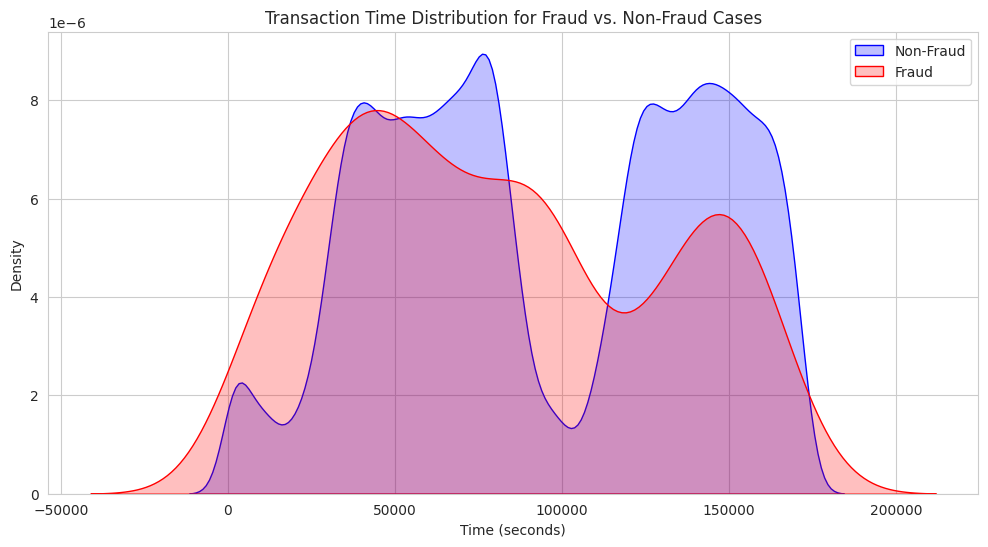

In [35]:
plt.figure(figsize=(12,6))
sns.kdeplot(data[data['Class'] == 0]['Time'], label="Non-Fraud", color="blue", fill=True)
sns.kdeplot(data[data['Class'] == 1]['Time'], label="Fraud", color="red", fill=True)
plt.title("Transaction Time Distribution for Fraud vs. Non-Fraud Cases")
plt.xlabel("Time (seconds)")
plt.ylabel("Density")
plt.legend()
plt.show()

# Data Preprocessing: Splitting and Scaling

In [36]:
# Separating features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

In [37]:
# Splitting data into training, validation, and test sets
X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [38]:
# Apply Standard Scaling to normalize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

# Over Sampling Using SMOTE + ENN

In [39]:
# Apply SMOTEENN to handle class imbalance
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [40]:
# Print new class distribution after SMOTEENN
from collections import Counter
print(f"Class distribution after SMOTEENN: {Counter(y_resampled)}")

Class distribution after SMOTEENN: Counter({1: 227451, 0: 227058})


# Model Performance Evaluation Function

In [41]:
# Define a function to evaluate model performance
def print_score(label, prediction, train=True):
    clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))

    if train:
        print("Train Result:\n" + "="*50)
    else:
        print("Test Result:\n" + "="*50)

    print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
    print("Classification Report:\n", clf_report)
    print("Confusion Matrix:\n", confusion_matrix(label, prediction), "\n")

Model 1: Artificial Neural Network (ANN)

In [42]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Precision, Recall, FalseNegatives, FalsePositives

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_resampled.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

# Print Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 256)                 │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,849 (558.00 KB)

 Trainable params: 141,313 (552.00 KB)

 Non-trainable params: 1,536 (6.00 KB)

In [43]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# ✅ Compute Class Weights for Imbalance Handling
classes = np.array([0, 1])
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# ✅ Convert to Dictionary Format
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# ✅ Print for Debugging
print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.5008661206149896, 1: 289.14340101522845}


In [50]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall(), FalseNegatives(), FalsePositives()]
)

# ✅ Define Early Stopping (before model training)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ✅ Train ANN Model with Early Stopping
r = model.fit(X_train, y_train, validation_data=(X_validate, y_validate),
              batch_size=512, epochs=64, verbose=1, class_weight=class_weights_dict,
              callbacks=[early_stopping])  # ✅ Add Early Stopping callback

# Evaluate ANN
y_train_pred = model.predict(X_resampled).round()
y_test_pred = model.predict(X_test).round()

print_score(y_resampled, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Epoch 1/64
446/446 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9960 - false_negatives_5: 2.0157 - false_positives_5: 472.2371 - loss: 0.0267 - precision_6: 0.3012 - recall_6: 0.9884 - val_accuracy: 0.9963 - val_false_negatives_5: 10.0000 - val_false_positives_5: 201.0000 - val_loss: 0.0142 - val_precision_6: 0.3045 - val_recall_6: 0.8980
Epoch 2/64
446/446 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9942 - false_negatives_5: 0.6421 - false_positives_5: 688.0470 - loss: 0.0186 - precision_6: 0.2229 - recall_6: 0.9973 - val_accuracy: 0.9965 - val_false_negatives_5: 9.0000 - val_false_positives_5: 191.0000 - val_loss: 0.0145 - val_precision_6: 0.3179 - val_recall_6: 0.9082
Epoch 3/64
446/446 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9939 - false_negatives_5: 1.1521 - false_positives_5: 695.5817 - loss: 0.0187 - precision_6: 0.2330 - recall_6: 0.9947 - val_accuracy: 0.9955 - val_false_negatives_5: 9.0000 - val_false_positives_5: 247.0000 - val_loss: 0.0195 - val_precision_

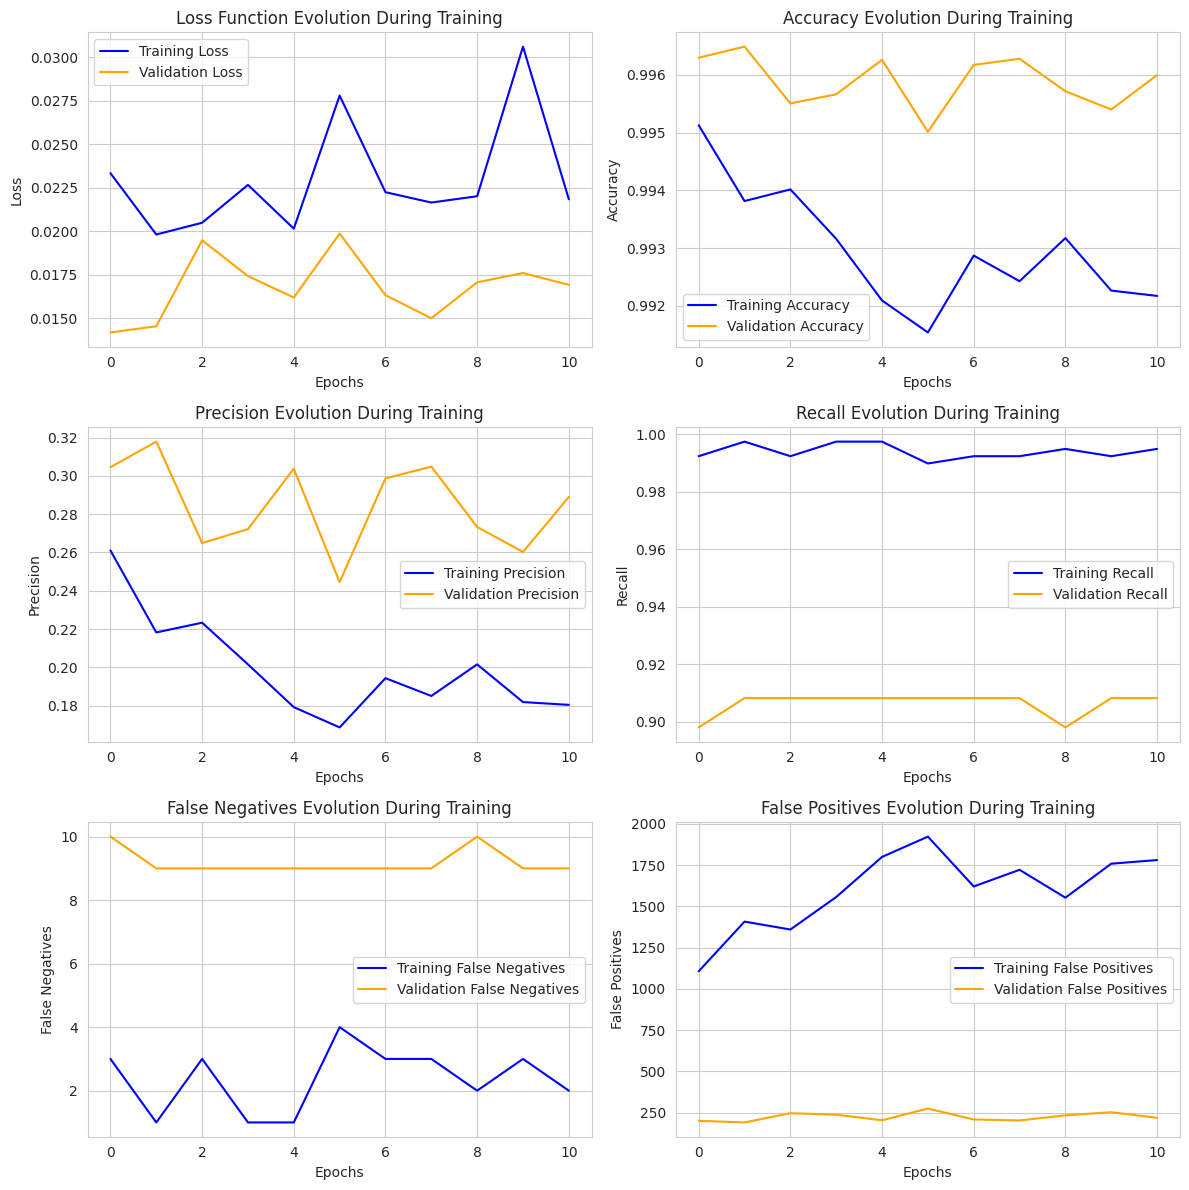

In [57]:
import matplotlib.pyplot as plt

# ✅ Use Correct Metric Names from r.history.keys()
precision_key = "precision_6"
recall_key = "recall_6"
val_precision_key = "val_precision_6"
val_recall_key = "val_recall_6"
false_negatives_key = "false_negatives_5"
false_positives_key = "false_positives_5"
val_false_negatives_key = "val_false_negatives_5"
val_false_positives_key = "val_false_positives_5"

# 📊 Model Training Evolution Visualization
plt.figure(figsize=(12, 12))

# 🔹 1. Loss Evolution
plt.subplot(3, 2, 1)
plt.plot(r.history['loss'], label='Training Loss', color='blue')
plt.plot(r.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Function Evolution During Training')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 🔹 2. Accuracy Evolution
plt.subplot(3, 2, 2)
plt.plot(r.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Evolution During Training')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# 🔹 3. Precision Evolution
plt.subplot(3, 2, 3)
plt.plot(r.history[precision_key], label='Training Precision', color='blue')
plt.plot(r.history[val_precision_key], label='Validation Precision', color='orange')
plt.title('Precision Evolution During Training')
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.legend()

# 🔹 4. Recall Evolution
plt.subplot(3, 2, 4)
plt.plot(r.history[recall_key], label='Training Recall', color='blue')
plt.plot(r.history[val_recall_key], label='Validation Recall', color='orange')
plt.title('Recall Evolution During Training')
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()

# 🔹 5. False Negatives Evolution
plt.subplot(3, 2, 5)
plt.plot(r.history[false_negatives_key], label='Training False Negatives', color='blue')
plt.plot(r.history[val_false_negatives_key], label='Validation False Negatives', color='orange')
plt.title('False Negatives Evolution During Training')
plt.xlabel("Epochs")
plt.ylabel("False Negatives")
plt.legend()

# 🔹 6. False Positives Evolution
plt.subplot(3, 2, 6)
plt.plot(r.history[false_positives_key], label='Training False Positives', color='blue')
plt.plot(r.history[val_false_positives_key], label='Validation False Positives', color='orange')
plt.title('False Positives Evolution During Training')
plt.xlabel("Epochs")
plt.ylabel("False Positives")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [52]:
print(r.history.keys())  # This will show the correct metric names

dict_keys(['accuracy', 'false_negatives_5', 'false_positives_5', 'loss', 'precision_6', 'recall_6', 'val_accuracy', 'val_false_negatives_5', 'val_false_positives_5', 'val_loss', 'val_precision_6', 'val_recall_6'])


Model 2: XGBoost

In [58]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_resampled, y_resampled)

y_train_pred = xgb_clf.predict(X_resampled)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_resampled, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:31:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train Result:
Accuracy Score: 100.00%
Classification Report:
                        0              1  accuracy      macro avg  \
precision       1.000000       0.999991  0.999996       0.999996   
recall          0.999991       1.000000  0.999996       0.999996   
f1-score        0.999996       0.999996  0.999996       0.999996   
support    227058.000000  227451.000000  0.999996  454509.000000   

            weighted avg  
precision       0.999996  
recall          0.999996  
f1-score        0.999996  
support    454509.000000  
Confusion Matrix:
 [[227056      2]
 [     0 227451]] 

Test Result:
Accuracy Score: 99.94%
Classification Report:
                       0           1  accuracy     macro avg  weighted avg
precision      0.999941    0.740113  0.999403      0.870027      0.999528
recall         0.999461    0.963235  0.999403      0.981348      0.999403
f1-score       0.999701    0.837061  0.999403      0.918381      0.999442
support    85307.000000  136.000000  0.999403  854

Model 3: Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_resampled, y_resampled)

y_train_pred = rf_clf.predict(X_resampled)
y_test_pred = rf_clf.predict(X_test)

print_score(y_resampled, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
Classification Report:
                   0         1  accuracy  macro avg  weighted avg
precision       1.0       1.0       1.0        1.0           1.0
recall          1.0       1.0       1.0        1.0           1.0
f1-score        1.0       1.0       1.0        1.0           1.0
support    227058.0  227451.0       1.0   454509.0      454509.0
Confusion Matrix:
 [[227058      0]
 [     0 227451]] 

Test Result:
Accuracy Score: 99.96%
Classification Report:
                       0           1  accuracy     macro avg  weighted avg
precision      0.999941    0.818750  0.999602      0.909346      0.999653
recall         0.999660    0.963235  0.999602      0.981448      0.999602
f1-score       0.999801    0.885135  0.999602      0.942468      0.999618
support    85307.000000  136.000000  0.999602  85443.000000  85443.000000
Confusion Matrix:
 [[85278    29]
 [    5   131]] 



Model 4: CatBoost

In [60]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(verbose=0)
cb_clf.fit(X_resampled, y_resampled)

y_train_pred = cb_clf.predict(X_resampled)
y_test_pred = cb_clf.predict(X_test)

print_score(y_resampled, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 99.99%
Classification Report:
                        0              1  accuracy      macro avg  \
precision       1.000000       0.999877  0.999938       0.999938   
recall          0.999877       1.000000  0.999938       0.999938   
f1-score        0.999938       0.999938  0.999938       0.999938   
support    227058.000000  227451.000000  0.999938  454509.000000   

            weighted avg  
precision       0.999938  
recall          0.999938  
f1-score        0.999938  
support    454509.000000  
Confusion Matrix:
 [[227030     28]
 [     0 227451]] 

Test Result:
Accuracy Score: 99.92%
Classification Report:
                       0           1  accuracy     macro avg  weighted avg
precision      0.999941    0.668367  0.999181      0.834154      0.999414
recall         0.999238    0.963235  0.999181      0.981237      0.999181
f1-score       0.999590    0.789157  0.999181      0.894373      0.999255
support    85307.000000  136.000000  0.999181  8544

Model 5: LightGBM

In [61]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_resampled, y_resampled)

y_train_pred = lgbm_clf.predict(X_resampled)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_resampled, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227451, number of negative: 227058
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.146116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454509, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500432 -> initscore=0.001729
[LightGBM] [Info] Start training from score 0.001729


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Train Result:
Accuracy Score: 99.97%
Classification Report:
                        0              1  accuracy      macro avg  \
precision       0.999996       0.999367  0.999681       0.999681   
recall          0.999366       0.999996  0.999681       0.999681   
f1-score        0.999681       0.999681  0.999681       0.999681   
support    227058.000000  227451.000000  0.999681  454509.000000   

            weighted avg  
precision       0.999681  
recall          0.999681  
f1-score        0.999681  
support    454509.000000  
Confusion Matrix:
 [[226914    144]
 [     1 227450]] 

Test Result:
Accuracy Score: 99.85%
Classification Report:
                       0           1  accuracy     macro avg  weighted avg
precision      0.999953    0.515625  0.998502      0.757789      0.999182
recall         0.998546    0.970588  0.998502      0.984567      0.998502
f1-score       0.999249    0.673469  0.998502      0.836359      0.998731
support    85307.000000  136.000000  0.998502  8544